<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## AIB / SECTION 4 / SC43x 

---



# Major Neural Network Architectures

이번 한 주간 CNN, U-Net, Autoencoder, GAN 등 다양한 주요 신경망 구조들에 대해서 배워봤습니다. 오늘은 그 모델들을 복습하는 시간을 가지도록 하겠습니다. 이 SC는 **신경망의 다양한 구조에 대한 이해와 지식**을 평가합니다. **모델을 높은 정확도를 가지도록 학습 시킬 수 있는지를 평가하려는 것이 아닙니다.**

아래의 방식들은 복잡한 연산을 요구합니다. 모든 파트의 문제들은 어떤 환경에서라도 (e.g. 로컬 주피터, Google Colab, etc.) 5-10분 내외로 결과값이 나오도록 제작이 됐기 때문에 만일 결과값을 도출하는데 그 이상의 시간이 걸린다면 여러분의 접근 방식을 재점검해보시기 바랍니다.

---

## 1. CNN

### 이미지 분류
Keras와  [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained)을 활용하여 `im_frog` 폴더에 있는 이미지 중 어떤 이미지에 개구리가 있는지 찾는 이미지 분류 모델을 작동시켜 보겠습니다.

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

## 2.1 Resnet$V_2$을 사용하기 위해서 전처리 함수를 사용하여 이미지를 전처리 하고 이미지들의 사이즈를 재조정하는 함수를 정의해봅시다.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


- **파일 경로와 이름을 불러옵니다.**

In [ ]:
import os

frog_dir = '/content/drive/MyDrive/Colab Notebooks/im_frog/'

In [ ]:
"""Hint : os 패키지 내에 파일 이름을 불러올 수 있는 메서드를 사용합니다."""

filenames = os.listdir(frog_dir)
filenames

['cristiane-teston-bcnfJvEYm1Y-unsplash.jpg',
 'drew-brown-VBvoy5gofWg-unsplash.jpg',
 'elizabeth-explores-JZybccsrB-0-unsplash.jpg',
 'ed-van-duijn-S1zA6AR50X8-unsplash.jpg',
 'serenity-mitchell-tUDSHkd6rYQ-unsplash.jpg',
 'matthew-kosloski-sYkr-M78H6w-unsplash.jpg',
 'priscilla-du-preez-oWJcgqjFb6I-unsplash.jpg',
 'yanna-zissiadou-SV-aMgliWNs-unsplash.jpg',
 'zdenek-machacek-HYTwWSE5ztw-unsplash (1).jpg',
 'marcus-neto-fH_DOdTt-pA-unsplash.jpg',
 'jared-evans-VgRnolD7OIw-unsplash.jpg',
 'mche-lee-j-P8z4EOgyQ-unsplash.jpg',
 'saturday_sun-_q37Ca0Ll4o-unsplash.jpg',
 'joel-henry-Rcvf6-n1gc8-unsplash.jpg',
 'jacky-watt-92W5jPbOj48-unsplash.jpg']

- **필요한 라이브러리 import 후 이미지를 불러와 예측하는 함수를 정의합니다.**

In [116]:
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf

In [ ]:
img_to_array(load_img(frog_dir+filenames[0]))

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.]],

       ...,

       [[15., 16., 11.],
        [14., 15., 10.],
        [14., 15., 10.],
        ...,
        [29., 29., 17.],
        [28., 28., 16.],
        [28., 28., 16.]],

       [[14., 15., 10.],
        [14., 15., 10.],
        [14., 15., 10.],
        ...,
        [29., 29., 17.],
        [28., 28., 16.],
        [28., 28., 16.]],

       [[13., 14.,  9.],
        [13., 14.,  9.],
        [12., 13.,  8.],
        ...,
        [30., 30., 18.],
        [30., 30., 18.],
        [29., 29., 17.]]

In [117]:
def load_and_preprocessing(base_dir, name, model):
    """
    이미지 1장을 받아 모델로 예측한 뒤
    가장 확률이 높은 클래스 번호를 출력하는 함수입니다.
    
    Hint:
        1. 
        2. array의 값을 직접 나누어 픽셀 값을 정규화합니다.
    Args:
        base_dir : 이미지 파일이 있는 경로입니다.
        name : 이미지 파일의 이름입니다.
        model : 예측에 사용할 모델입니다.
    """
    image_path = base_dir
    image = load_img(image_path+name)
    input_arr = img_to_array(image) / 255.

    #resize the image
    input_arr = layers.experimental.preprocessing.Resizing(224,224)(input_arr)
    
    input_arr = np.array([input_arr])
    predictions = model.predict(input_arr)
    predict_class = np.argmax(predictions, axis=1) 
    print(predict_class[0])

    return predict_class[0]

## 2.2 ResNet50v2 모델을 사용해 이미지 분류(예측)를 진행합니다. 예측 결과는 자유롭게 출력해봅니다.
> 참고: `ResNet50v2`는 "frog"로 예측하지 않습니다. "frog"의 label은 "bullfrog, treefrog, tailed frog"입니다

In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

resnetV2 = ResNet50V2(weights='imagenet', include_top = True, input_shape=(224,224,3))
resnetV2.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

- **기존에 정의한 함수(`load_and_preprocessing`)를 사용하여 이미지 분류를 진행하여봅니다.**

In [ ]:
# 출력되는 클래스의 번호를 모두 리스트에 저장하여 predict_class 에 할당합니다.

predict_class = [load_and_preprocessing(frog_dir, filename, resnetV2) for filename in filenames]

309
30
807
308
985
397
58
113
31
738
32
985
58
31
868


- **클래스의 이름을 다운받아 출력하여봅니다.**

In [ ]:
!git clone https://github.com/anishathalye/imagenet-simple-labels.git

Cloning into 'imagenet-simple-labels'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 21 (delta 1), reused 10 (delta 1), pack-reused 10
Unpacking objects: 100% (21/21), done.


In [ ]:
str.

In [106]:
print([i for i in labels if i.endswith('cat')])

['tabby cat', 'tiger cat', 'Persian cat', 'Siamese cat', 'European polecat']


In [ ]:
import json

with open ('/content/imagenet-simple-labels/imagenet-simple-labels.json') as f:
    labels = json.load(f)

for i in predict_class:
    print(labels[i])

bee
American bullfrog
solar thermal collector
fly
daisy
pufferfish
water snake
snail
tree frog
pot
tailed frog
daisy
water snake
tree frog
tray


---

Advanced
- 개구리 이외의 다른 객체를 탐지하는 모델을 만들어보세요 (예: 물고기)
- 이미지를 예측한 label과 같이 출력해보세요
- 예측 모델을 함수로 만들어 보세요 (물론 주석도 잘 되어있어야 합니다)

고양이 탐지 모델 생성

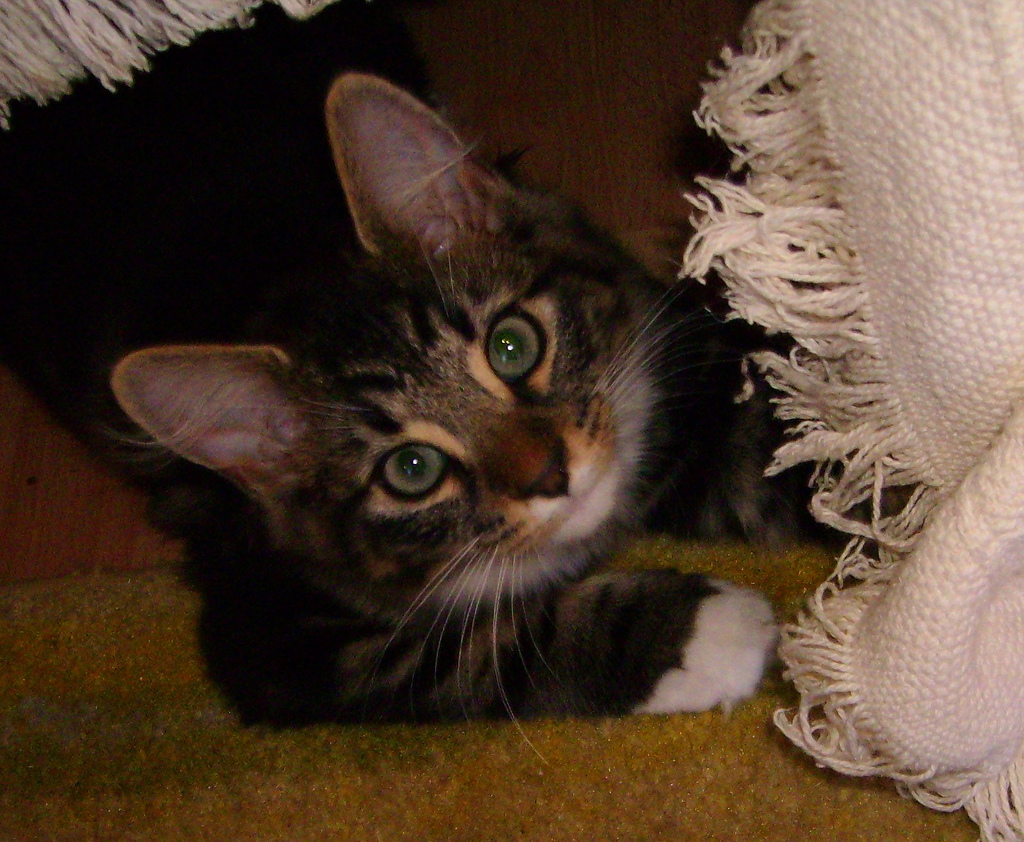

In [113]:
# cat detection
cat_dir = '/content/drive/MyDrive/Colab Notebooks/cat_images/'
cat_filenames = os.listdir(cat_dir)

# 1st example
load_img(cat_dir+cat_filenames[0])

In [136]:
predict_class = [load_and_preprocessing(cat_dir, filename, resnetV2) for filename in cat_filenames]

save_cat_labels = []
for i in predict_class:
    print(labels[i])
    save_cat_labels.append(labels[i])

281
284
281
283
283
281
285
285
283
tabby cat
Siamese cat
tabby cat
Persian cat
Persian cat
tabby cat
Egyptian Mau
Egyptian Mau
Persian cat


예측 라벨과 함께 출력

Text(0.5, 0.98, 'So cute..')

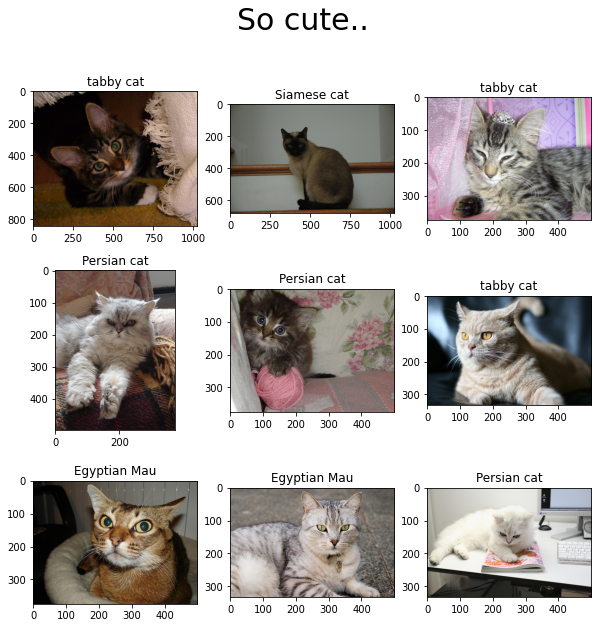

In [139]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,3,figsize=(10,10))
k = 0
for i in range(3):
    for j in range(3):
        img_to_show = img_to_array(load_img(cat_dir+cat_filenames[k]))/255
        ax[i,j].imshow(img_to_show)
        ax[i,j].set_title(save_cat_labels[k])
        k += 1

plt.suptitle('So cute..', size=30)

함수 생성

In [141]:
# make function of the cat detection model

def cat_detection(number):
    # set the file direction
    cat_dir = '/content/drive/MyDrive/Colab Notebooks/cat_images/'
    cat_filenames = os.listdir(cat_dir)

    # load an image chosen by number
    load_img(cat_dir+cat_filenames[number])

    # predict class of the image
    predict_class = [load_and_preprocessing(cat_dir, cat_filenames[number], resnetV2)]

    # load label
    import json
    with open ('/content/imagenet-simple-labels/imagenet-simple-labels.json') as f:
        labels = json.load(f)

    # find the detected label
    detected_label = labels[predict_class[0]]
    

    # plot a cute cat image we found!
    plt.figure()    
    plt.imshow(img_to_array(load_img(cat_dir+cat_filenames[number]))/255.)
    plt.title(f'We found : {detected_label}!', size=30)
    
    
    return detected_label



281
284
281
283
283


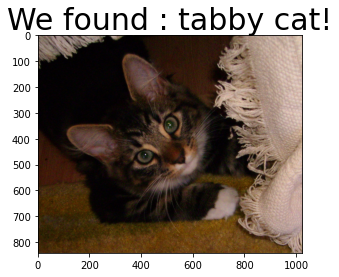

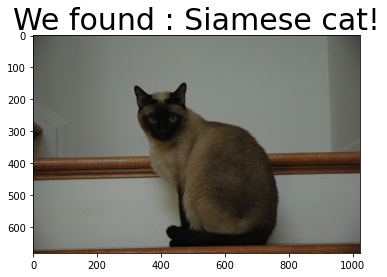

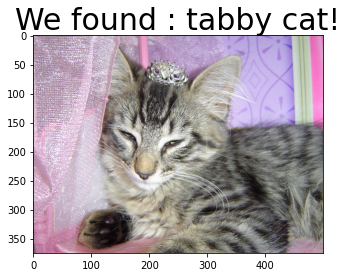

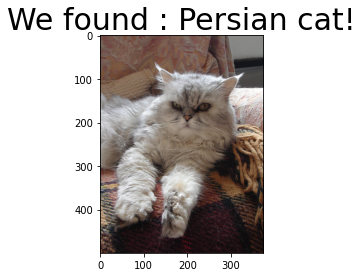

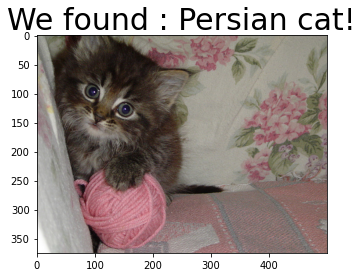

In [145]:
for i in range(5):
    cat_detection(i)

## 2. U-Net

Lecture Note에서는 U-Net의 백본(backbone)모델로 `MobileNetV2`를 사용하여 segmentation을 수행하였습니다.<br/>
이번 SC에서는 ResNet50을 백본으로 하여 같은 문제를 풀어보세요.

참고로 resnet에서의 block은 아래 예시의 3개의 레이어를 참조하여 만들어주세요.<br/>
예시는 16x16 까지만 나타나 있지만 Lecture Note 와 같이 4x4까지 만들어 주어야 모델을 완성할 수 있습니다.

```
    'conv1_relu', # 64x64
    'conv2_block3_out', # 32x32 
    'conv3_block4_out', # 16x16
```

In [ ]:
!pip install git+https://github.com/tensorflow/examples.git
!pip install -U tfds-nightly

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-6gr4euh1
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-6gr4euh1
  Created wheel for tensorflow-examples: filename=tensorflow_examples-189c662d500c20b9f9e93fef0af97d5311e64377_-py3-none-any.whl size=268428 sha256=2caa331ce85cd209041dc8e8b422ddffc1795f6778e9ff73a74b16749ea57402
  Stored in directory: /tmp/pip-ephem-wheel-cache-adhorjr7/wheels/eb/19/50/2a4363c831fa12b400af86325a6f26ade5d2cdc5b406d552ca
Failed to build tensorflow-examples
    Running setup.py install for tensorflow-examples ... done
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.
     |████████████████████████████████| 4.1 MB 5.5 MB/s 


In [ ]:
import tensorflow as tf

from tensorflow_examples.models.pix2pix import pix2pix

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from IPython.display import clear_output
import matplotlib.pyplot as plt

In [ ]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

def normalize(input_image, input_mask):
    """
    이미지를 정규화하는 코드입니다.
    각 픽셀값을 최댓값인 255로 나누어줍니다.
    """
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

@tf.function
def load_image_train(datapoint):
    """
    훈련 데이터셋에 해당하는 이미지와 레이블을 불러오는 함수입니다.
    불러오는 과정에서 사이즈를 조정하고 이미지 증강에 해당하는 filp 및 정규화를 적용합니다.
    """
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

def load_image_test(datapoint):
    """
    시험 데이터셋에 해당하는 이미지와 레이블을 불러오는 함수입니다.
    불러오는 과정에서 사이즈를 조정하고 정규화를 적용합니다.
    """
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test)

train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [ ]:
def display(display_list):
    """
    입력 이미지와 타겟 레이블, 예측 레이블의 결과를 시각화하는 함수입니다.
    """
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

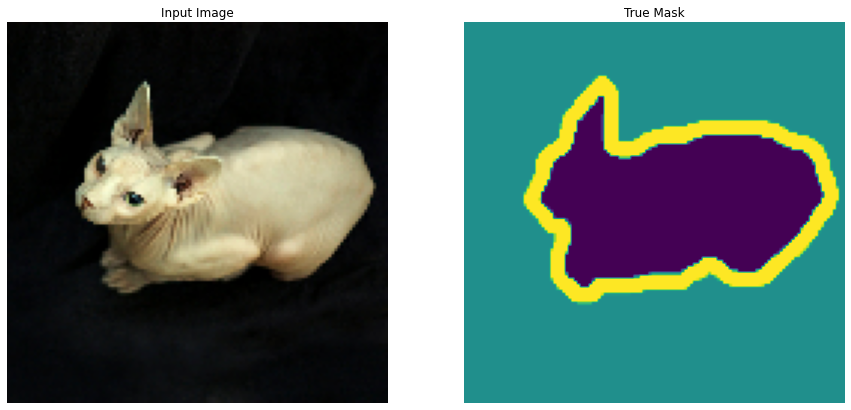

In [ ]:
for image, mask in train.take(1):
    sample_image, sample_mask = image, mask

display([sample_image, sample_mask])

In [ ]:
OUTPUT_CHANNELS = 3

In [ ]:
base_model0 = tf.keras.applications.ResNet50(input_shape=[128, 128, 3], include_top=False)

base_model0.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat

In [ ]:
# downsampling 부분


In [ ]:
def unet_model(output_channels):
    """
    모델을 정의하는 함수입니다.
    """
    inputs = tf.keras.layers.Input(shape=[128, 128, 3])
    x = inputs

    # Downsampling을 진행하는 부분입니다.
    skips = down_stack(x)
    x = skips[-1]
    skips = reversed(skips[:-1])

    # Upsampling을 진행하는 부분입니다.
    for up, skip in zip(up_stack, skips):
        x = up(x)
        # Downsampling 결과를 Concatenate 해줍니다.
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

    # 출력되는 이미지 크기를 동일하게 하기 위해 마지막 층을 구현합니다.
    last = tf.keras.layers.Conv2DTranspose(
        output_channels, 3, strides=2,
        padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

In [92]:
model = unet_model(OUTPUT_CHANNELS)

In [93]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_1 (Functional)           [(None, 64, 64, 64)  14644096    ['input_10[0][0]']               
                                , (None, 32, 32, 25                                               
                                6),                                                               
                                 (None, 16, 16, 512                                               
                                ),                                                          

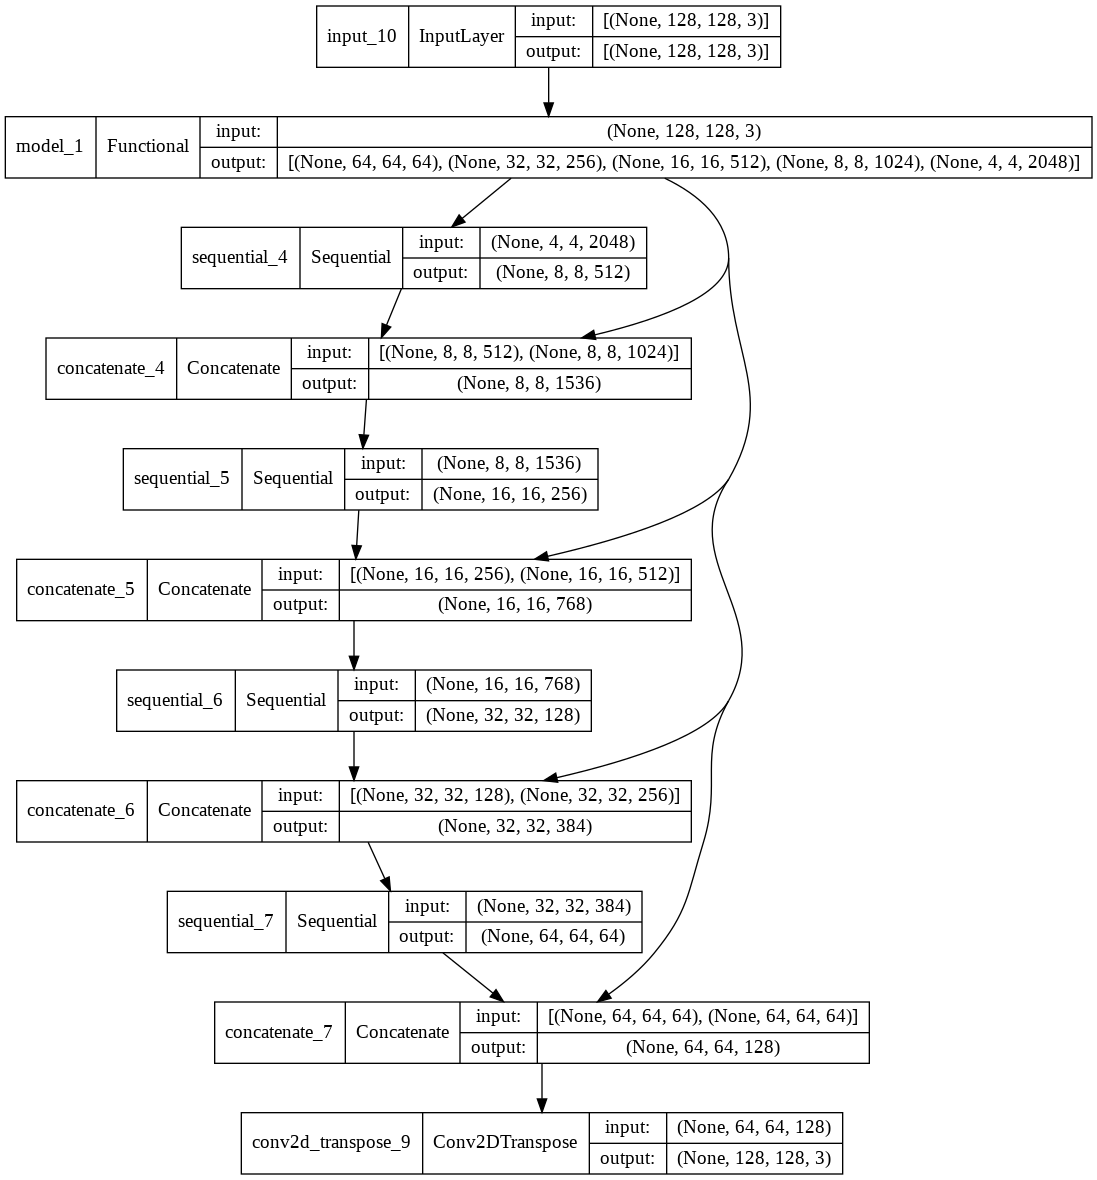

In [94]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [95]:
def create_mask(pred_mask):
    """
    예측 시 픽셀의 레이블을 확정하는 함수입니다.
    """
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [96]:
def show_predictions(dataset=None, num=1):
    """
    예측한 레이블을 시각화하는 함수입니다.
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
                create_mask(model.predict(sample_image[tf.newaxis, ...]))])

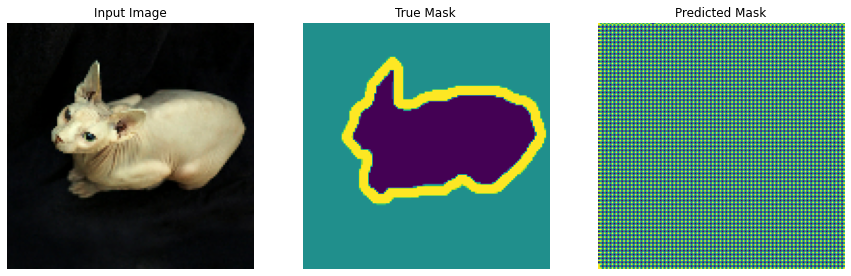

In [97]:
show_predictions()

In [98]:
class DisplayCallback(tf.keras.callbacks.Callback):
    """
    에포크마다 보여줄 수 있되
    매 에포크마다 이전 결과가 지워지도록 하는 Callback 클래스 입니다.
    """
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions()
        print ('\n에포크 이후 예측 예시 {}\n'.format(epoch+1))

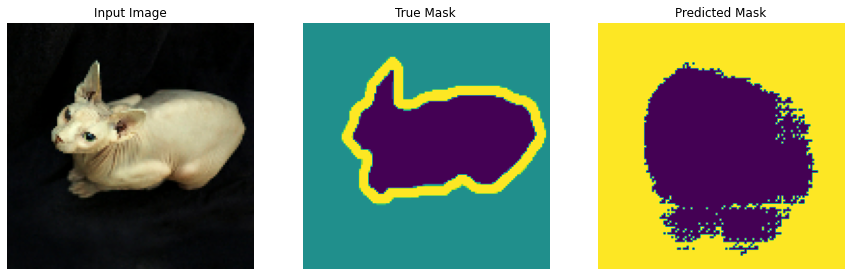


에포크 이후 예측 예시 3

57/57 [==============================] - 30s 534ms/step - loss: 0.6298 - accuracy: 0.7369 - val_loss: 0.7697 - val_accuracy: 0.7330


In [100]:
EPOCHS = 3
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])

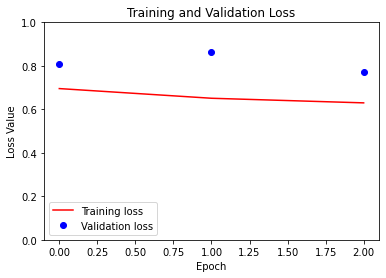

In [101]:
# 학습 곡선 시각화

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

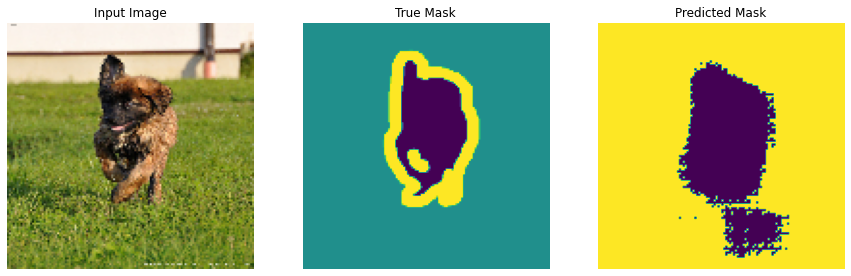

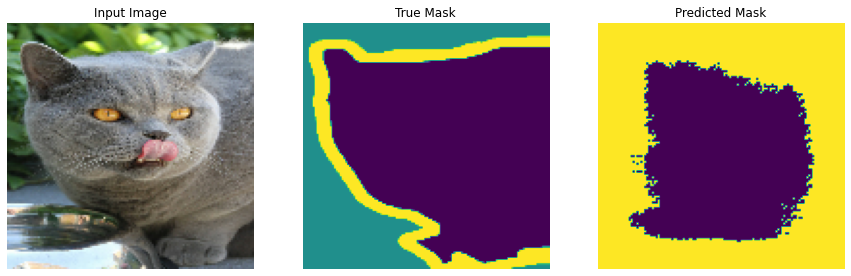

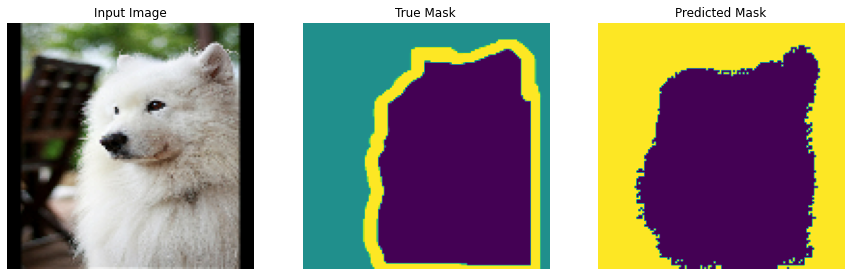

In [102]:
show_predictions(test_dataset, 3)

## 3. Free Response
> 동료들에게 설명한다고 생각하고 간단하게 몇 문장으로 작성하세요.

### 3.1 딥러닝이 왜 중요하다고 생각하시나요?

딥러닝은 근래 들어 문명에게 새롭게 열린 하나의 창이라고 생각합니다. 기계 학습의 범위는 갈수록 넓어질 것이고 이에 따라 우리 사회는 정말 많이 변혁을 겪을 것입니다. 그래서 이를 아는 것은 매우 중요하다고 생각합니다.

### 3.2 딥러닝의 다양한 분야 중에서 좀 더 심도있게 배우고 싶은 분야는 무엇인가요? 왜 그렇게 생각하시나요?

저는 시계열 예측 및 분류에 관심이 많습니다. 자연어 처리와 이미지 영역에 비해 시계열 영역에서의 딥러닝은 그만큼 각광받는 성능을 내지는 못한다고 생각합니다. 이는 반대로 생각하면 시계열 영역에서의 딥러닝의 확장 가능성이 아직 드러나지 않았다고도 볼 수 있습니다. 

### 3.3 인공지능이 우리 사회에서 대체할 수 있는 직업이 무엇이라고 생각하시나요?


인공지능은 앞으로 우리 사회의 기술, 서비스 등 모든 것을 대체할 수 있다고 볼 수 있습니다. 하지만 고도로 전문적인 영역이나 인문학적 소양이 필요한 곳에서는 그나마 사람이 필요하지 않을까요

### 3.4 반대로 인공지능 때문에, 딥러닝 때문에 더 생겨날 직업은 무엇이 있을까요?


인공지능 자체를 관리하거나 이를 가지고 서비스에 접목시키는 직업들은 더욱 더 많이 생겨날 것 같습니다.


### 3.5 여러분이 생각하실 때 Strong AI라고 불리우는 [일반 인공지능 (Artificial General Intelligence)](https://ko.wikipedia.org/wiki/%EC%9D%B8%EA%B3%B5_%EC%9D%BC%EB%B0%98_%EC%A7%80%EB%8A%A5)을 개발해내는 것이 가능할 것 같나요? 왜 그렇게 생각하시나요?

거의 사람과 비슷하게 모사하거나 인지하는 정도로까지는, 즉 사람의 감각이나 사고의 일부까지는 기계가 구현할 수 있으리라 생각합니다. 이정도까지지 Strong AI라고 한다면 가능할 것 같습니다.   
하지만 위에서 이야기한 대로 사람의 감정, 내적 성찰 까지 기계가 할 수 있을지는 모르겠네요. 이것까지 기계가 가능하다면, 우리가 믿고 있었던 고유한 인격, 영적 개념이나 종교에 대한 개념이 뿌리채 흔들릴지도 모르지요.

### 3.6 Coutinous learning에 대해서 조사해보고 인지한 부분에 대해서 작성해보세요.

Continuous learning 이란 주어진 업무 이외에도 스스로 학습하고 성장할 수 있는 환경을 마련해 줌으로써 구성원들이 더 높은 수준으로 성장하고 업무의 효율을 높일 수 있다는 것을 의미하기도 하고, 삶의 관점에서도 끊임없이 자기 발전을 위해 노력하는 것을 의미한다고 이해했습니다. 공부는 죽어야 끝난다 라는 명언과 어느 정도 부합하는 개념이라고 할 수 있겠습니다.

# Advanced Goals: 3점을 받기 위해서는 아래의 조건 중에서 3개 이상을 달성하셔야 합니다

### 1
    - 개구리 이외의 다른 객체를 탐지하는 모델을 만들어보세요 (예: 물고기)
    - 이미지를 예측한 label과 같이 출력해보세요
    - 예측 모델을 함수로 만들어 보세요 (물론 주석도 잘 되어있어야 합니다)
### 2
    - U-Net 을 직접 구현하여 동일한 문제를 수행해보세요. 
### 3
    - 작성한 답안을 몇 문장보다 조금 더 상세하게 작성해보세요
    - 왜 그렇게 생각하게 되었는 지 관련 근거를 서술하세요.
### 추가과제
    - GAN을 이용한 프로젝트를 새롭게 구현해보세요.